In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df = pd.read_csv('tabular/final_tracks.csv', skipinitialspace=False)

In [3]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'genre', 'id'],
      dtype='object')

# Data partitioning

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
y = df["genre"]
X = df.drop(columns=["id", "name", "artists", "genre"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8)

In [7]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

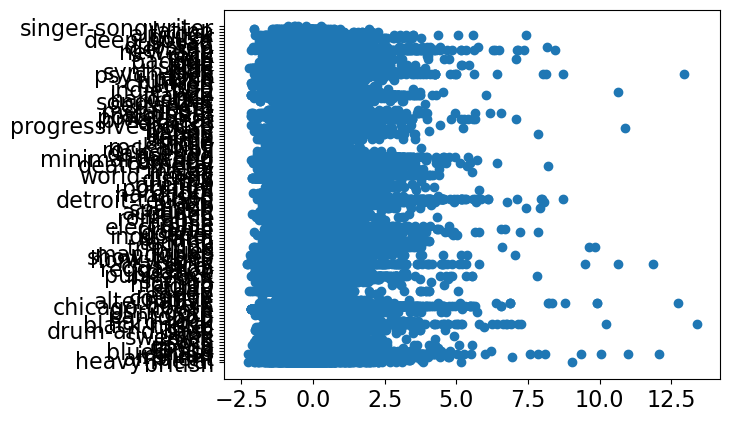

In [9]:
plt.scatter(X_train.T[0], y_train)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [16]:
clf = LogisticRegression(random_state=0, multi_class="ovr")
clf.fit(X_train.T[0].reshape(-1,1), y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [17]:
y_pred = clf.predict(X_test.T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.03164456444056222
F1-score [0.         0.         0.         0.         0.         0.
 0.02883075 0.         0.         0.         0.         0.
 0.         0.10042965 0.         0.         0.         0.01715266
 0.         0.         0.         0.         0.         0.
 0.07627119 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.13492621 0.         0.         0.         0.         0.
 0.         0.         0.03486728 0.         0.0436205  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.       

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00       269
         afrobeat       0.00      0.00      0.00       301
         alt-rock       0.00      0.00      0.00       101
      alternative       0.00      0.00      0.00       143
          ambient       0.00      0.00      0.00       261
            anime       0.00      0.00      0.00       210
      black-metal       0.02      0.10      0.03       273
        bluegrass       0.00      0.00      0.00       313
            blues       0.00      0.00      0.00       169
           brazil       0.00      0.00      0.00       252
        breakbeat       0.00      0.00      0.00       303
          british       0.00      0.00      0.00       177
         cantopop       0.00      0.00      0.00       255
    chicago-house       0.05      0.67      0.10       279
         children       0.00      0.00      0.00       292
            chill       0.00      0.00      0.00       

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
